<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Shopping_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXTRACTION

In [7]:
shop = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/shopping_trends.csv")
shop.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

DATA PREPROCESSING

---

In [8]:
columns_to_drop = [0,8,13,14,15,17]
shop = shop.drop(shop.columns[columns_to_drop], axis=1)
shop.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Winter,3.1,Yes,Credit Card,14,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Winter,3.1,Yes,Bank Transfer,2,Fortnightly


In [9]:
shop_cop = shop.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

obj = shop_cop.select_dtypes(include='object').columns

for i in obj:
  shop_cop[i] = enc.fit_transform(shop_cop[i])
shop_cop.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,55,1,2,1,53,16,0,3,3.1,1,2,14,3
1,19,1,23,1,64,18,0,3,3.1,1,0,2,3


DATA ANALYSIS

---

In [23]:
sns.set()

<Axes: xlabel='count', ylabel='Category'>

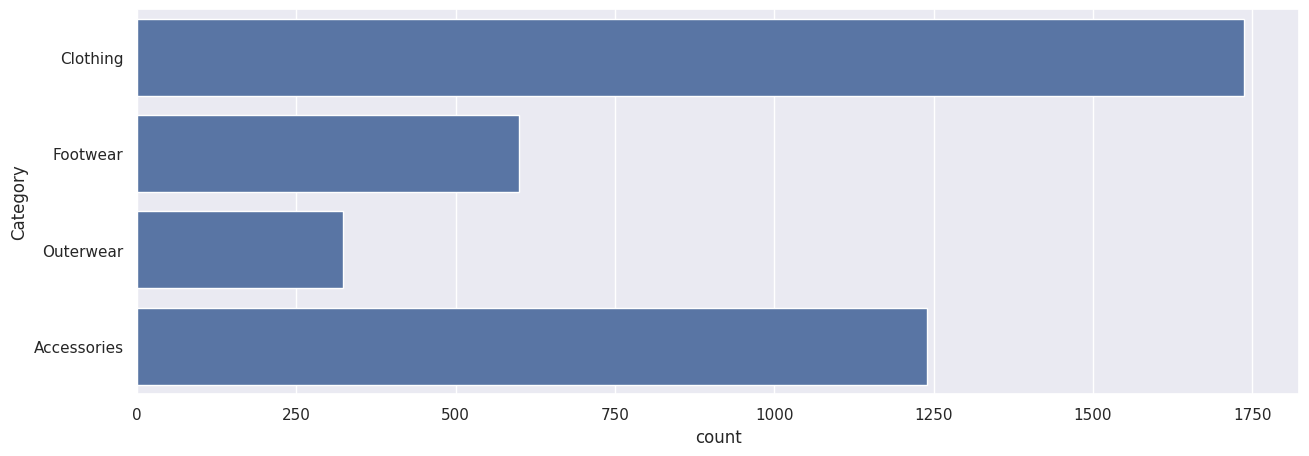

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y="Category", data=shop)

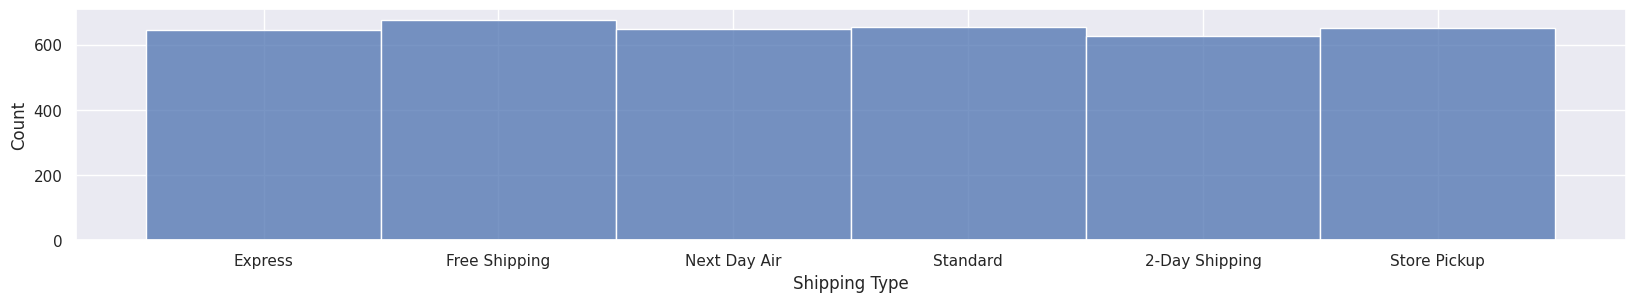

In [ ]:
plt.figure(figsize=(20,3))
sns.histplot(shop['Shipping Type'])
plt.show()

In [11]:
corr = shop_cop.corr()

In [12]:
print(corr['Purchase Amount (USD)'].sort_values(ascending=False).round(3)*100)

Purchase Amount (USD)     100.0
Review Rating               3.1
Location                    2.9
Size                        2.8
Payment Method              1.3
Previous Purchases          0.8
Item Purchased             -0.5
Subscription Status        -0.7
Age                        -1.0
Gender                     -1.4
Frequency of Purchases     -1.7
Category                   -1.8
Season                     -1.8
Name: Purchase Amount (USD), dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [14]:
X = shop_cop.drop(columns=['Purchase Amount (USD)'], axis=1)
y = shop['Purchase Amount (USD)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
X_pred = rg.predict(X_test)
r2_scr = r2_score(y_test, X_pred)

print(f"Score of test is :{r2_scr}")

Score of test is :-0.04288885363579764


In [22]:
importance = rg.feature_importances_.round(3)*100
columns = X.columns
feature_importance = pd.DataFrame({'Columns': columns,
                                   'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                   Columns  Importance
0                      Age        15.0
10      Previous Purchases        14.8
4                 Location        14.4
7            Review Rating        12.6
2           Item Purchased        11.8
11  Frequency of Purchases         7.4
9           Payment Method         6.6
6                   Season         4.9
5                     Size         4.5
3                 Category         4.1
1                   Gender         1.9
8      Subscription Status         1.9


K-MEANS CLUSTERING

In [24]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

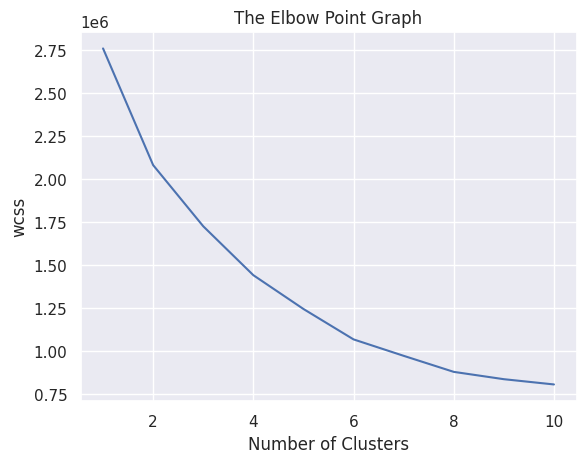

In [25]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

Y

array([9, 1, 4, ..., 4, 4, 5], dtype=int32)